In [2]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from textblob import TextBlob
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
stop_words = set(stopwords.words('english'))

In [ ]:
import pandas as p

In [3]:
df = pd.read_csv('vaccination_tweets.csv')
pd.set_option("display.max_colwidth", None)
df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA","Aggregator of Asian American news; scanning diverse sources 24/7/365. RT's, Follows and 'Likes' will fuel me 👩‍💻",2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s music junkie. Fascinated by meteorology and all things in the cloud. Opinions are my own.",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,"While the world has been on the wrong side of history this year, hopefully, the biggest vaccination effort we've ev… https://t.co/dlCHrZjkhm",NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBioNTech #Moderna #Covid_19 Russian vaccine is created to last 2-4 years… https://t.co/ieYlCKBr8P,"['coronavirus', 'SputnikV', 'AstraZeneca', 'PfizerBioNTech', 'Moderna', 'Covid_19']",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radio Network. Weeknights 7 Pacific-10 Eastern - Email comments/ideas to charles@charlesadlertonight.ca",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're not ethically sturdy enough to acknowledge them. (1) You were born i… https://t.co/jqgV18kch4",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternative news source from citizen journalists that haven't sold out. Real news & real views,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @BorisJohnson @MattHancock #whereareallthesickpeople #PfizerBioNTech… https://t.co/KxbSRoBEHq,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [1]:
b = 5

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11020 entries, 0 to 11019
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                11020 non-null  int64 
 1   user_name         11020 non-null  object
 2   user_location     8750 non-null   object
 3   user_description  10341 non-null  object
 4   user_created      11020 non-null  object
 5   user_followers    11020 non-null  int64 
 6   user_friends      11020 non-null  int64 
 7   user_favourites   11020 non-null  int64 
 8   user_verified     11020 non-null  bool  
 9   date              11020 non-null  object
 10  text              11020 non-null  object
 11  hashtags          8438 non-null   object
 12  source            11019 non-null  object
 13  retweets          11020 non-null  int64 
 14  favorites         11020 non-null  int64 
 15  is_retweet        11020 non-null  bool  
dtypes: bool(2), int64(6), object(8)
memory usage: 1.2+ MB


In [4]:
df.isnull().sum()


id                     0
user_name              0
user_location       2270
user_description     679
user_created           0
user_followers         0
user_friends           0
user_favourites        0
user_verified          0
date                   0
text                   0
hashtags            2582
source                 1
retweets               0
favorites              0
is_retweet             0
dtype: int64

In [5]:
df.columns


Index(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet'],
      dtype='object')

In [6]:
text_df = df.drop(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet'], axis=1)
text_df.head()

,text
0,Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF
1,"While the world has been on the wrong side of history this year, hopefully, the biggest vaccination effort we've ev… https://t.co/dlCHrZjkhm"
2,#coronavirus #SputnikV #AstraZeneca #PfizerBioNTech #Moderna #Covid_19 Russian vaccine is created to last 2-4 years… https://t.co/ieYlCKBr8P
3,"Facts are immutable, Senator, even when you're not ethically sturdy enough to acknowledge them. (1) You were born i… https://t.co/jqgV18kch4"
4,Explain to me again why we need a vaccine @BorisJohnson @MattHancock #whereareallthesickpeople #PfizerBioNTech… https://t.co/KxbSRoBEHq


In [7]:
print(text_df['text'].iloc[0], "\n")
print(text_df['text'].iloc[1], "\n")
print(text_df['text'].iloc[2], "\n")
print(text_df['text'].iloc[3], "\n")
print(text_df['text'].iloc[4], "\n")

Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF 

While the world has been on the wrong side of history this year, hopefully, the biggest vaccination effort we've ev… https://t.co/dlCHrZjkhm 

#coronavirus #SputnikV #AstraZeneca #PfizerBioNTech #Moderna #Covid_19 Russian vaccine is created to last 2-4 years… https://t.co/ieYlCKBr8P 

Facts are immutable, Senator, even when you're not ethically sturdy enough to acknowledge them. (1) You were born i… https://t.co/jqgV18kch4 

Explain to me again why we need a vaccine @BorisJohnson @MattHancock #whereareallthesickpeople #PfizerBioNTech… https://t.co/KxbSRoBEHq 



In [8]:
text_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11020 entries, 0 to 11019
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    11020 non-null  object
dtypes: object(1)
memory usage: 86.2+ KB


In [9]:
def data_processing(text):
    text = text.lower()
    text = re.sub(r"https\S+|www\S+https\S+", '',text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#','',text)
    text = re.sub(r'[^\w\s]','',text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)


In [10]:
text_df.text = text_df['text'].apply(data_processing)
text_df = text_df.drop_duplicates('text')

In [11]:
text_df.head()

,text
0,folks said daikon paste could treat cytokine storm pfizerbiontech
1,world wrong side history year hopefully biggest vaccination effort weve ev
2,coronavirus sputnikv astrazeneca pfizerbiontech moderna covid_19 russian vaccine created last 24 years
3,facts immutable senator even youre ethically sturdy enough acknowledge 1 born
4,explain need vaccine borisjohnson matthancock whereareallthesickpeople pfizerbiontech


In [12]:
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [13]:
text_df['text'] = text_df['text'].apply(lambda x: stemming(x))
text_df.head()

,text
0,folks said daikon paste could treat cytokine storm pfizerbiontech
1,world wrong side history year hopefully biggest vaccination effort weve ev
2,coronavirus sputnikv astrazeneca pfizerbiontech moderna covid_19 russian vaccine created last 24 years
3,facts immutable senator even youre ethically sturdy enough acknowledge 1 born
4,explain need vaccine borisjohnson matthancock whereareallthesickpeople pfizerbiontech


In [14]:

print(text_df['text'].iloc[0],"\n")
print(text_df['text'].iloc[1],"\n")
print(text_df['text'].iloc[2],"\n")
print(text_df['text'].iloc[3],"\n")
print(text_df['text'].iloc[4],"\n")

folks said daikon paste could treat cytokine storm pfizerbiontech 

world wrong side history year hopefully biggest vaccination effort weve ev 

coronavirus sputnikv astrazeneca pfizerbiontech moderna covid_19 russian vaccine created last 24 years 

facts immutable senator even youre ethically sturdy enough acknowledge 1 born 

explain need vaccine borisjohnson matthancock whereareallthesickpeople pfizerbiontech 



In [15]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10543 entries, 0 to 11019
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    10543 non-null  object
dtypes: object(1)
memory usage: 164.7+ KB


In [16]:
def polarity(text):
    return TextBlob(text).sentiment.polarity

In [17]:
text_df['polarity'] = text_df['text'].apply(polarity)
text_df.head(10)

,text,polarity
0,folks said daikon paste could treat cytokine storm pfizerbiontech,0.000
1,world wrong side history year hopefully biggest vaccination effort weve ev,-0.500
2,coronavirus sputnikv astrazeneca pfizerbiontech moderna covid_19 russian vaccine created last 24 years,0.000
3,facts immutable senator even youre ethically sturdy enough acknowledge 1 born,0.100
4,explain need vaccine borisjohnson matthancock whereareallthesickpeople pfizerbiontech,0.000
5,anyone useful adviceguidance whether covid vaccine safe whilst breastfeeding,0.400
6,bit sad claim fame success vaccination patriotic competition usa canada uk,-0.100
7,many bright days 2020 best 1 bidenharris winning election2020,0.675
8,covid vaccine getting covidvaccine covid19 pfizerbiontech moderna,0.000
9,covidvaccine states start getting covid19vaccine monday us says pakustv nyc healthcare globalgoals,0.000


In [18]:
def sentiment(label):
    if label <0:
        return "Negative"
    elif label ==0:
        return "Neutral"
    elif label>0:
        return "Positive"

In [19]:
text_df['sentiment'] = text_df['polarity'].apply(sentiment)
text_df.head()

,text,polarity,sentiment
0,folks said daikon paste could treat cytokine storm pfizerbiontech,0.0,Neutral
1,world wrong side history year hopefully biggest vaccination effort weve ev,-0.5,Negative
2,coronavirus sputnikv astrazeneca pfizerbiontech moderna covid_19 russian vaccine created last 24 years,0.0,Neutral
3,facts immutable senator even youre ethically sturdy enough acknowledge 1 born,0.1,Positive
4,explain need vaccine borisjohnson matthancock whereareallthesickpeople pfizerbiontech,0.0,Neutral


<AxesSubplot:xlabel='sentiment', ylabel='count'>

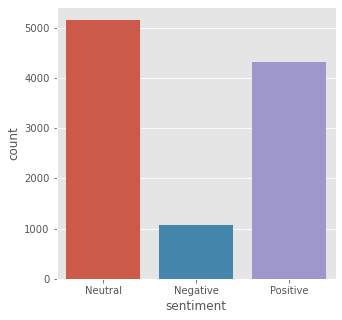

In [20]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='sentiment', data = text_df)

Text(0.5, 1.0, 'Distribution of sentiments')

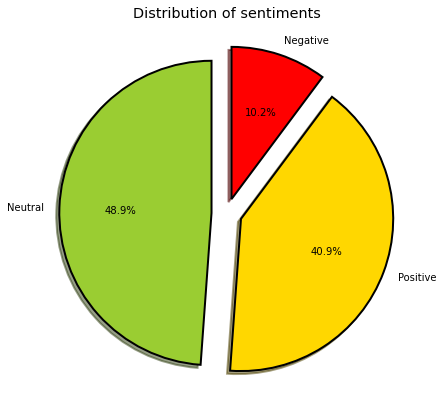

In [21]:
fig = plt.figure(figsize=(7,7))
colors = ("yellowgreen", "gold", "red")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = text_df['sentiment'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors,
         startangle=90, wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of sentiments')

In [22]:
pos_tweets = text_df[text_df.sentiment == 'Positive']
pos_tweets = pos_tweets.sort_values(['polarity'], ascending= False)
pos_tweets.head()

,text,polarity,sentiment
9317,best way get merrygoround pfizer pfizerbiontech pfizerstock,1.0,Positive
2340,applying emotion pfizerbiontech based best evidence support extending time,1.0,Positive
6295,pfizer jab morning efficient wellorganised thank wonderful doctor gav,1.0,Positive
5041,get art printed awesome products support redbubble rbandme findyourthing,1.0,Positive
1055,already vaccinated getting vaccine soon plan travel abroad best dmc tripadvisor reviews,1.0,Positive


In [23]:
type(text_df)

pandas.core.frame.DataFrame

In [24]:
type(pos_tweets)

pandas.core.frame.DataFrame

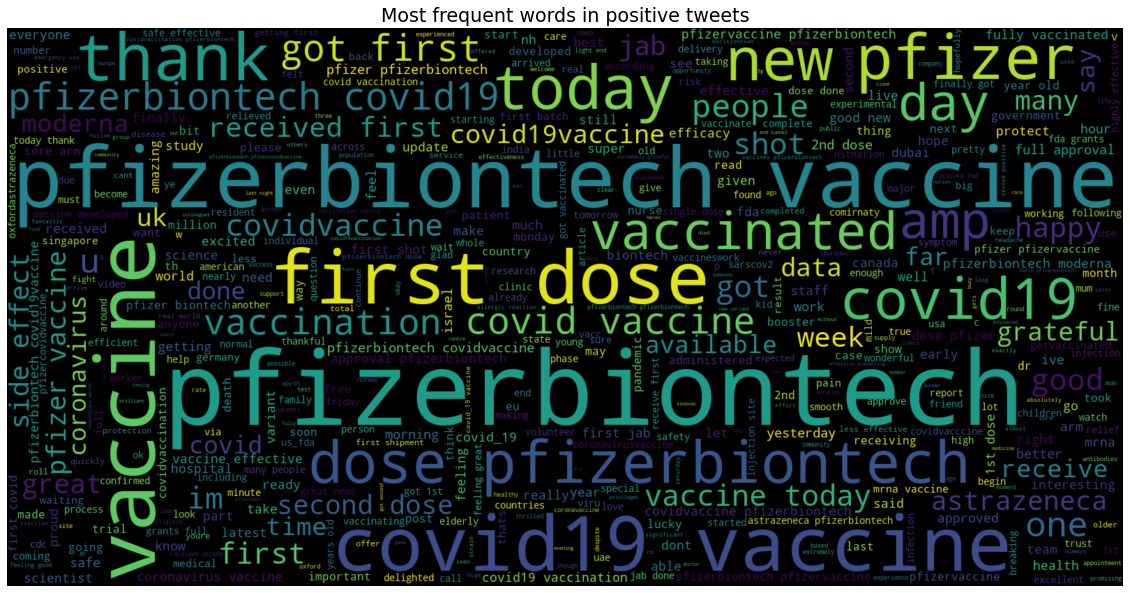

In [25]:
text = ' '.join([word for word in pos_tweets['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in positive tweets', fontsize=19)
plt.show()

In [26]:
neg_tweets = text_df[text_df.sentiment == 'Negative']
neg_tweets = neg_tweets.sort_values(['polarity'], ascending= False)
neg_tweets.head()

,text,polarity,sentiment
2912,work skilled nursing facility got first vaccine far less painful flu vaccin,-0.003333,Negative
7256,200321 752308 vaccinations new daily record daily vaccination numbers rolling 7 day average,-0.003409,Negative
2073,ukgovernment cant even vaccinate properly ethically get right kinds wrong,-0.004762,Negative
7715,got first dose less waiting time airport vaccination center pain side effects,-0.005556,Negative
7157,nas_k27 second dose due end next month well far pfizerbiontech,-0.006250,Negative


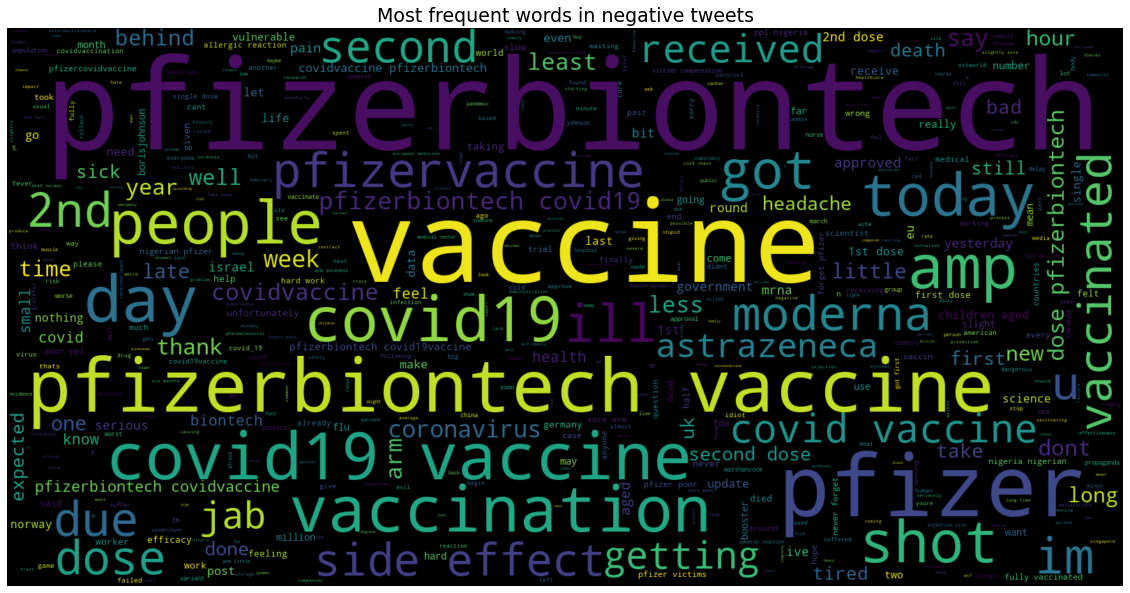

In [27]:
text = ' '.join([word for word in neg_tweets['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in negative tweets', fontsize=19)
plt.show()

In [28]:
neutral_tweets = text_df[text_df.sentiment == 'Neutral']
neutral_tweets = neutral_tweets.sort_values(['polarity'], ascending= False)
neutral_tweets.head()

,text,polarity,sentiment
0,folks said daikon paste could treat cytokine storm pfizerbiontech,0.0,Neutral
7347,anyone else feel like framing vaccine card pfizervaccine pfizerbiontech betterthanchristmas,0.0,Neutral
7458,looking forward getting second pfizer shot anyone else got vaccinated pfizer,0.0,Neutral
7454,never thought id running diff vaccine modernavaccine pfizerbiontech,0.0,Neutral
7453,john___m dont get choose one person know asked preference go choice id fe,0.0,Neutral


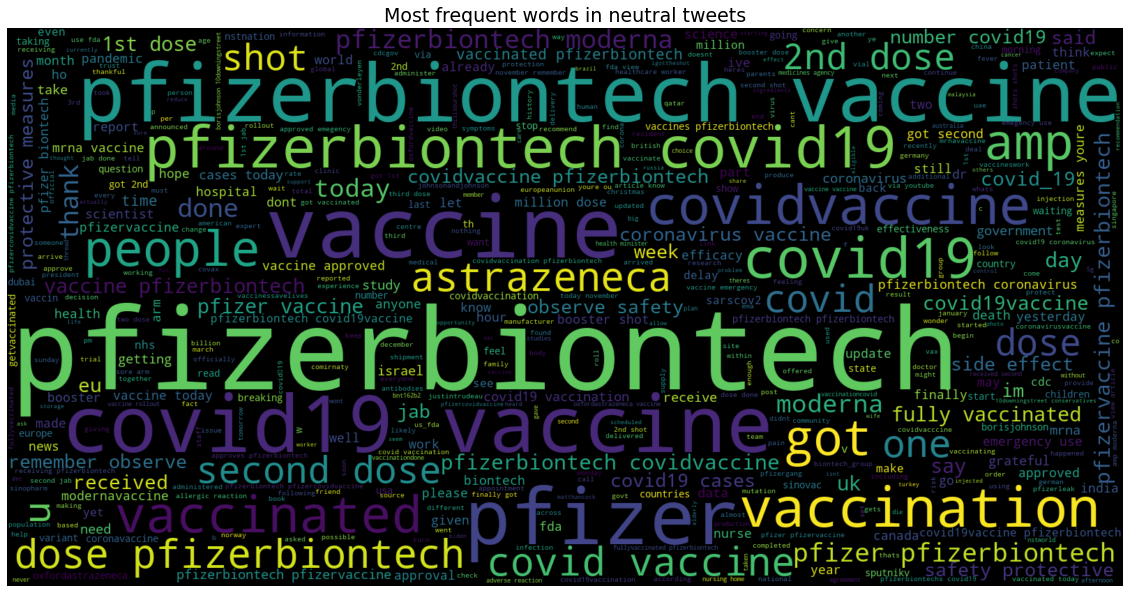

In [29]:
text = ' '.join([word for word in neutral_tweets['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in neutral tweets', fontsize=19)
plt.show()

In [31]:
type(neutral_tweets)

pandas.core.frame.DataFrame

In [32]:
neutral_tweets

,text,polarity,sentiment
0,folks said daikon paste could treat cytokine storm pfizerbiontech,0.0,Neutral
7347,anyone else feel like framing vaccine card pfizervaccine pfizerbiontech betterthanchristmas,0.0,Neutral
7458,looking forward getting second pfizer shot anyone else got vaccinated pfizer,0.0,Neutral
7454,never thought id running diff vaccine modernavaccine pfizerbiontech,0.0,Neutral
7453,john___m dont get choose one person know asked preference go choice id fe,0.0,Neutral
...,...,...,...
3740,fully vaccinated wondering dose 2 pfizerbiontech 24 hours later fever chill,0.0,Neutral
3735,nstnation malaysians singapore begin receiving covid19 vaccine pfizerbiontech,0.0,Neutral
3734,warnings come hackers revealed ema concerns pfizerbiontech vaccine safety variable effectives rates,0.0,Neutral
3733,number people died receiving pfizer vaccine shot norway rises 29 coronavirusvaccine covid19,0.0,Neutral


In [33]:
vect = CountVectorizer(ngram_range=(1,2)).fit(text_df['text'])


In [35]:
type(vect)

sklearn.feature_extraction.text.CountVectorizer